# Seminar 4

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts

import IPython.display as dp
import matplotlib.pyplot as plt
import seaborn as sns

dp.set_matplotlib_formats("retina")
sns.set(style="whitegrid", font_scale=1.5)
sns.despine()

%matplotlib inline

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_31083/3109700056.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  dp.set_matplotlib_formats("retina")


<Figure size 640x480 with 0 Axes>

## Random variables

A **random variable** is a function from sample space to the real numbers $X: S \to \mathbb{R}$.

It means that for every outcome $\omega \in S$ there is a real number $X(\omega)$.

The function needs to be measureable, but this topic is slightly beyond the scope of our course. Normal functions that you encounter in maths are all measureable.

## Distribution of a random variable

Consider random variable $X: S \to \mathbb{R}$. The values it can attain are therefore real numbers. We introduce **the distribution** (or distribution law) $\mathcal{L}$ of random variable $X$. Distribution takes values of the random variable and outputs their probabilities. It is not the same as probability function $P$, because probability function works with events from sample space and distribution works with values of random variables. We will write $X \sim \mathcal{L}$.

## Two types of distributions

A probability distribution can be **discrete** or **continuous**.

Discrete random variables can only take countably many values (like integers), continuous random variables can take uncountably many values (like reals).

There is also a third type of distributions, which you never encounter in practice; it's possible for a distribution to be a mix of several types, which you also do not normally encounter.

## Example 1

Consider event $A$ and a random variable $X = \mathbb{I}\text{nd}_A$, an indicator:
$$
\mathbb{I}\text{nd}_A(x) = \begin{cases}
1, x \in A, \\
0, \text{else}
\end{cases}
$$

$$
\mathbb{P}(X = 1) = \mathbb{P}(A) = p
$$

$$
\mathbb{P}(X = 0) = 1 - \mathbb{P}(A) = 1 - p
$$

We say that $X$ follows **Bernoulli distribution** with parameter $p$ and write $X \sim Be(p)$.

We will call $p_X(x) = \mathbb{P}_X(X=x)$ a **probability mass function** (PMF).

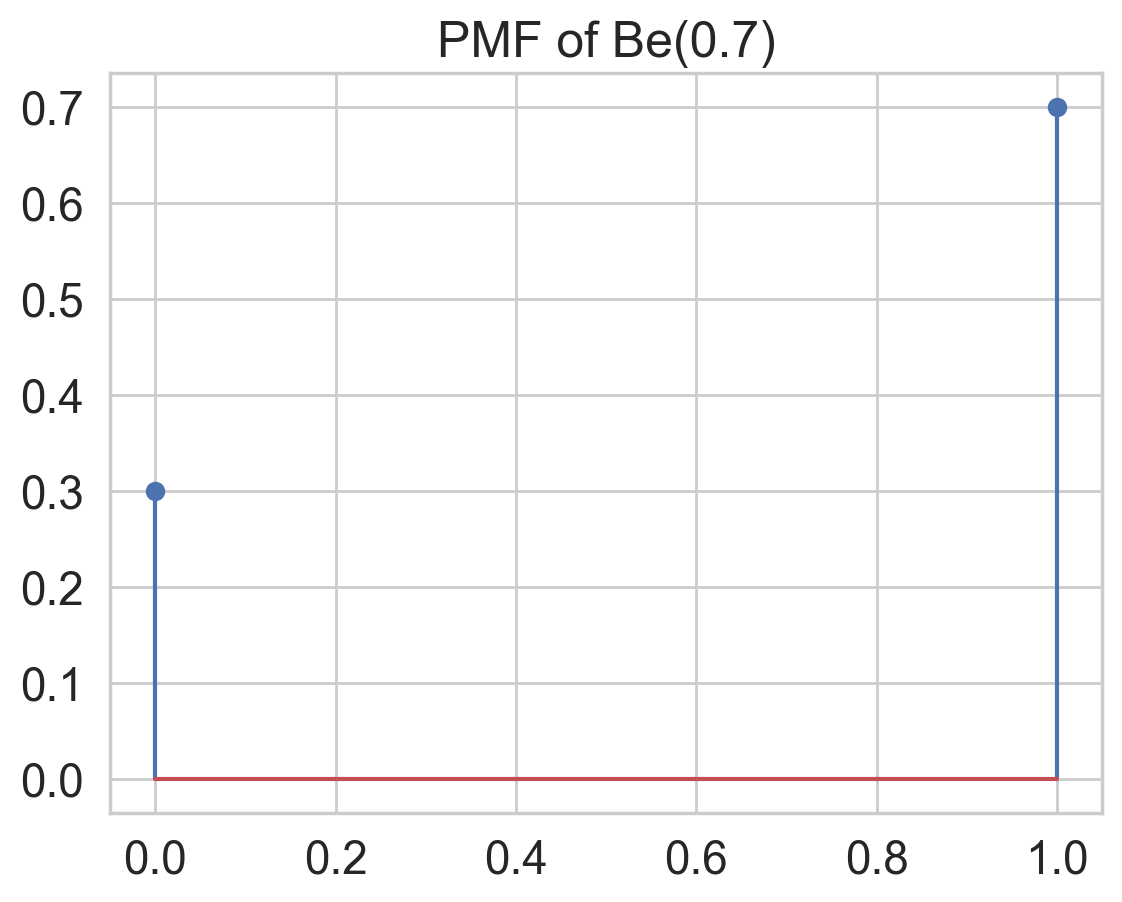

In [2]:
fig, ax = plt.subplots()
ax.stem([0, 1], [0.3, 0.7])
ax.set_title("PMF of Be(0.7)");

## Bernoulli trial scheme

Previously we have worked with independent events that were happening in one probability space. But sometimes we want to have multiple trials, where for every trial the probability space is known, but we are interested in the probability space covering all the trials at once. We can achieve it via direct product of probability spaces.

If all probability spaces are the same and equal to:
- $S = \{0, 1\}$
- $\mathbb{P}(1) = p$ and $\mathbb{P}(0) = 1 - p$

Then we call such experiment a **Bernoulli trial scheme**, and the probability space of it is:
- $S = \{(i_1, \ldots, i_n), i_j \in \{0, 1\}\}$
- $\mathbb{P}(i_1, \ldots, i_n) = p^{\text{num} j \text{ such that } i_j = 1} (1 - p)^{\text{num} j \text{ such that } i_j = 0}$

## Bernoulli trial scheme

<img src="seminar4_bad_latex.png"></img>

## Example 2

Consider $X_1, \ldots, X_n \sim Be(p)$ independent random variables. Then $Y = \sum_{k=1}^n X_k$ follows **Binomial distribution** with parameters $n$ and $p$, $Y \sim Bi(n, p)$. $\mathbb{P}(Y = k) = ?$

## Solution 2

If $Y \sim Bi(n, p)$, then
$$
\mathbb{P}(Y = k) = \begin{pmatrix}n\\k\end{pmatrix} p^k (1-p)^{n-k}
$$

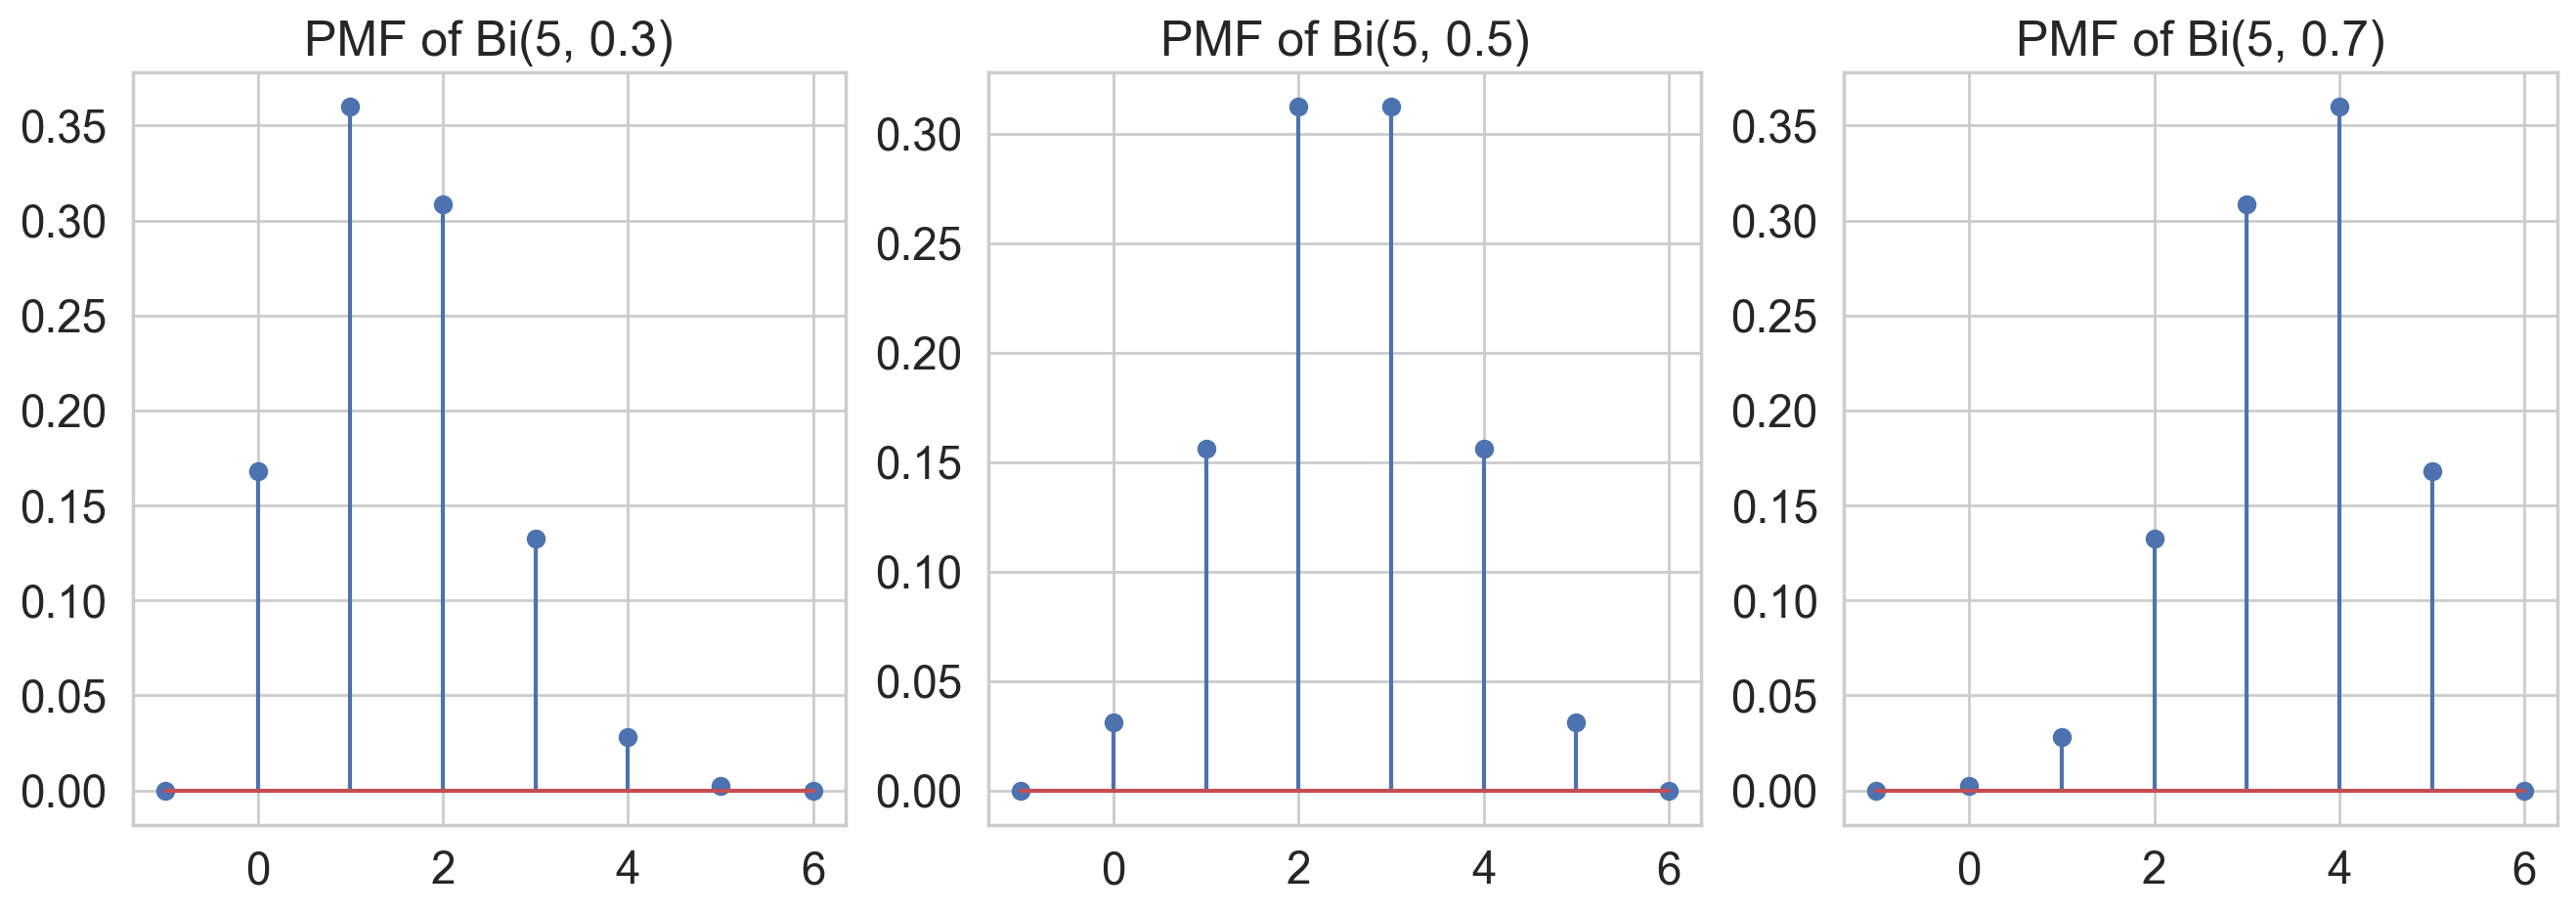

In [3]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
ax[0].stem(np.arange(-1, 7), sts.binom.pmf(np.arange(-1, 7), 5, 0.3))
ax[0].set_title("PMF of Bi(5, 0.3)")
ax[1].stem(np.arange(-1, 7), sts.binom.pmf(np.arange(-1, 7), 5, 0.5))
ax[1].set_title("PMF of Bi(5, 0.5)")
ax[2].stem(np.arange(-1, 7), sts.binom.pmf(np.arange(-1, 7), 5, 0.7))
ax[2].set_title("PMF of Bi(5, 0.7)");

## Example 3

We say $X$ follows discrete uniform distribution $DU([1, n])$ and we write $X \sim DU([1, n])$ if
$$
P(X = k) = \frac1n
$$

## Example 4

Consider an urn with $w$ white balls and $b$ black balls. We draw $n$ balls out of the urn at random without replacement. Let $X$ be the number of white balls in the sample. What is the distribution of $X$? What is its PMF?

## Solution 4

If $X \sim HGeom(w, b, n)$, then
$$
\mathbb{P}(X = k) = \frac{\begin{pmatrix}w\\k\end{pmatrix}\begin{pmatrix}b\\n-k\end{pmatrix}}{\begin{pmatrix}w+b\\n\end{pmatrix}}
$$

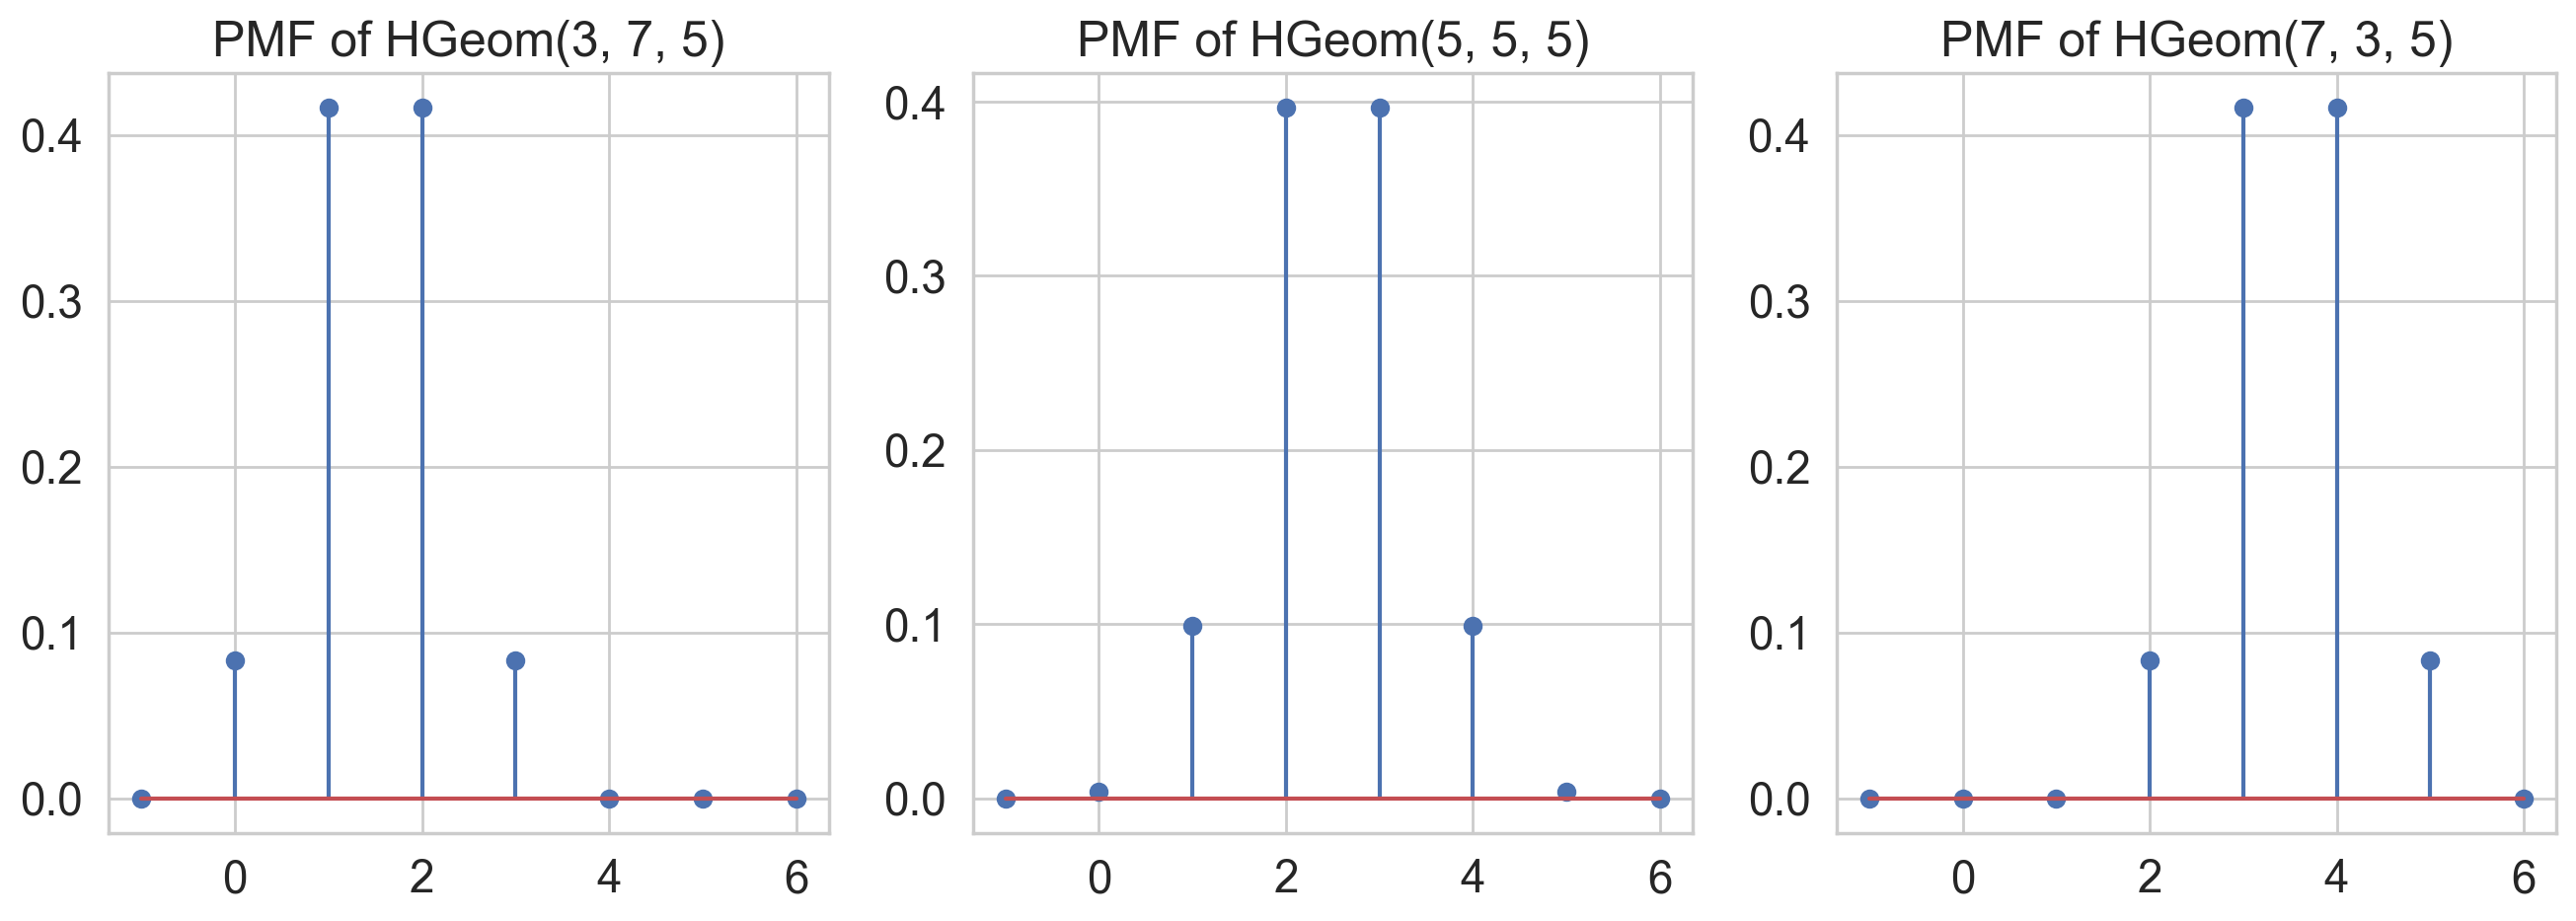

In [4]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
ax[0].stem(np.arange(-1, 7), sts.hypergeom.pmf(np.arange(-1, 7), 10, 3, 5))
ax[0].set_title("PMF of HGeom(3, 7, 5)")
ax[1].stem(np.arange(-1, 7), sts.hypergeom.pmf(np.arange(-1, 7), 10, 5, 5))
ax[1].set_title("PMF of HGeom(5, 5, 5)")
ax[2].stem(np.arange(-1, 7), sts.hypergeom.pmf(np.arange(-1, 7), 10, 7, 5))
ax[2].set_title("PMF of HGeom(7, 3, 5)");

## Example 5

What is the difference between hypergeometric and binomial distributions?

Reminder:
- Binomial story: Consider and urn with $w$ white balls and $b$ black balls. We draw $n$ balls from the urn with replacement. Let $X$ be the number of white balls in the sample.
- Hypergeometric story: Consider an urn with $w$ white balls and $b$ black balls. We draw $n$ balls out of the urn at random without replacement. Let $X$ be the number of white balls in the sample.

Bernoulli trials in Binomial story are independent. The Bernoulli trials in the Hypergeometric story are dependent, since the sampling is done without replacement.

## Example 5

Consider $X$ and $Y$ independent $\mathbb{Z}$-valued random variables. $\mathbb{P}(X + Y = k) = ?$

## Solution 5

$$
\mathbb{P}(X + Y = k) = \sum_{m} \mathbb{P}(X = m) \mathbb{P}(Y = k - m)
$$

## Example 6

Let $X \sim Bi(n, p)$ and $Y \sim Bi(m, p)$ be independent. What is the distribution of $Z = X + Y$?

## Solution 6

$$
\begin{aligned}
\mathbb{P}(X + Y = k) & = \sum_j \begin{pmatrix}n\\j\end{pmatrix} p^j (1-p)^{n-j} \begin{pmatrix}m\\k-j\end{pmatrix} p^{k-j} (1-p)^{m-k+j} = \\
& = p^{k} (1-p)^{n+m-k} \sum_j \begin{pmatrix}n\\j\end{pmatrix} \begin{pmatrix}m\\k-j\end{pmatrix} = \\
& =\begin{pmatrix}n+m\\k\end{pmatrix} p^{k} (1-p)^{n+m-k}
\end{aligned}
$$

$$
Z \sim Bi(n+m, p)
$$